In [1]:
import nltk
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu, modified_precision
from nltk.translate.chrf_score import sentence_chrf, corpus_chrf
from nltk.metrics import scores
import scipy.io.wavfile
from IPython.display import Audio
from IPython.display import display
from nltk.stem import *
# from nltk.stem.snowball import SnowballStemmer
from stemming.porter2 import stem
import stemming
from nltk.metrics.scores import recall

from nltk.corpus import stopwords

%matplotlib inline

In [2]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)

In [3]:
smooth_fun = nltk.translate.bleu_score.SmoothingFunction()

In [4]:
from nmt_run import *

fisher + callhome sp/es - en configuration
--------------------------------------------------
loading info_dict from=./both_fbank_out/info.dict


 30%|██▉       | 41300/138708 [00:00<00:00, 412989.56it/s]

--------------------------------------------------
creating buckets for: fisher_dev
creating buckets for key: sp
creating buckets for: fisher_dev2
creating buckets for key: sp
creating buckets for: fisher_test
creating buckets for key: sp
creating buckets for: fisher_train
creating buckets for key: sp


100%|██████████| 14284/14284 [00:00<00:00, 399406.93it/s]


creating buckets for: callhome_devtest
creating buckets for key: sp
creating buckets for: callhome_evltest
creating buckets for key: sp
creating buckets for: callhome_train
creating buckets for key: sp
--------------------------------------------------
saving info dict in: ./both_fbank_out/buckets_sp.dict
all done ...
--------------------------------------------------
showing buckets for category: fisher_dev
number of buckets=15, width of each bucket=150
index | width | num   
    0 |     0 |   1039
    1 |   150 |   1006
    2 |   300 |    614
    3 |   450 |    400
    4 |   600 |    315
    5 |   750 |    246
    6 |   900 |    159
    7 |  1050 |    113
    8 |  1200 |     49
    9 |  1350 |     27
   10 |  1500 |      6
   11 |  1650 |      1
   12 |  1800 |      2
   13 |  1950 |      0
   14 |  2100 |      0
--------------------------------------------------
showing buckets for category: fisher_dev2
number of buckets=15, width of each bucket=150
index | width | num   
    0 |   

/afs/inf.ed.ac.uk/group/project/lowres/work/anaconda3/envs/chainer3/lib/python3.6/site-packages/chainer/utils/experimental.py:104: FutureWarning: chainer.links.normalization.layer_normalization.py is experimental. The interface can change in the future.
  FutureWarning)


using ADAM optimizer


In [5]:
model_files = [f for f in os.listdir(os.path.dirname(model_fil))
                   if os.path.basename(model_fil).replace('.model','') in f]
# print(model_files)

In [6]:
max_model_fil = max(model_files, key=lambda s: int(s.split('_')[-1].split('.')[0]))

In [7]:
max_model_fil

'seq2seq_sen-138819_hwy0-dec3_emb-256-h-128__full1__sp_en_w_gru_drpt-0.4_noise-0_l2-0.001000_32_32_2_2_2DCNN_LN_BI_RNN_enc-3_27.model'

In [8]:
last_epoch = check_model()

--------------------------------------------------------------------------------
model found = 
new_vocab_fsh_fbank/seq2seq_sen-138819_hwy0-dec3_emb-256-h-128__full1__sp_en_w_gru_drpt-0.4_noise-0_l2-0.001000_32_32_2_2_2DCNN_LN_BI_RNN_enc-3_27.model
loading ...
finished loading ..


In [9]:
log_dev_fil_name

'new_vocab_fsh_fbank/dev_sen-138819_hwy0-dec3_emb-256-h-128__full1__sp_en_w_gru_drpt-0.4_noise-0_l2-0.001000_32_32_2_2_2DCNN_LN_BI_RNN_enc-3.log'

In [10]:
log_train = np.loadtxt(log_train_fil_name, delimiter=',', skiprows=False).transpose()
log_test = np.genfromtxt(log_dev_fil_name, delimiter=',', usecols = (0,1,2)).transpose()

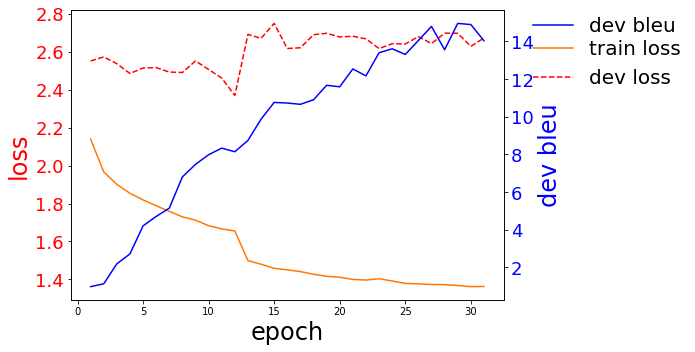

In [11]:
fig, ax1 = plt.subplots()
fig.set_size_inches(8,5)
ax1.plot(log_train[0], log_train[1], color='#ff7700')
ax1.plot(log_test[0], log_test[1], 'r--')
ax1.set_xlabel('epoch', size=24)
ax1.set_ylabel('loss', color='r', size=24)
for tl in ax1.get_yticklabels():
    tl.set_color('r')
    tl.set_fontsize(18)
plt.legend(['train loss', 'dev loss'], bbox_to_anchor=(1.45, 0.96), framealpha=0, fontsize=20)    
ax2 = ax1.twinx()
ax2.plot(log_test[0], log_test[2]*100, 'b-')
ax2.set_xlabel('iteration')
ax2.set_ylabel('dev bleu', color='b', size=24)
# ax1.set_xlim(0, 60)
for tl in ax2.get_yticklabels():
    tl.set_color('b')
    tl.set_fontsize(18) 
plt.legend(['dev bleu'], bbox_to_anchor=(1.44, 1.04), framealpha=0, fontsize=20)
# plt.legend(['dev bleu'], bbox_to_anchor=(1.06, 0.9), framealpha=0, fontsize=20)
plt.grid(False)
plt.tight_layout()

In [12]:
import nltk.translate.bleu_score

In [13]:
def play_utt(utt, m_dict):
    sr, y = scipy.io.wavfile.read(os.path.join(wavs_path, utt.rsplit("-",1)[0]+'.wav'))
    start_t = min(seg['start'] for seg in m_dict[utt]['seg'])
    end_t = max(seg['end'] for seg in m_dict[utt]['seg'])
    print(start_t, end_t)
    start_t_samples, end_t_samples = int(start_t*sr), int(end_t*sr)
    display(Audio(y[start_t_samples:end_t_samples], rate=sr))

In [14]:
def display_words(m_dict, v_dict, preds, utts, dec_key, key, play_audio=False, displayN=50):
    es_ref = []
    en_ref = []
    for u in utts:
        es_ref.append(" ".join([w.decode() for w in m_dict[u]['es_w']]))
        if type(m_dict[u][dec_key]) == list:
            en_ref.append(" ".join([w.decode() for w in m_dict[u]['en_w']]))
        else:
            en_ref.append(" ".join([w.decode() for w in m_dict[u]['en_w'][0]]))

    en_pred = []
    join_str = ' ' if dec_key.endswith('_w') else ''

    for p in preds:
        t_str = join_str.join([v_dict['i2w'][i].decode() for i in p])
        t_str = t_str[:t_str.find('_EOS')]
        en_pred.append(t_str)

    for u, es, en, p in zip(utts, es_ref, en_ref, en_pred):
        # for reference, 1st word is GO_ID, no need to display
        print("Utterance: {0:s}".format(u))
        display_pp = PrettyTable(["cat","sent"], hrules=True)
        display_pp.align = "l"
        display_pp.header = False
        display_pp.add_row(["es ref", textwrap.fill(es,50)])
        display_pp.add_row(["en ref", textwrap.fill(en,50)])
        display_pp.add_row(["en pred", textwrap.fill(p,50)])

        print(display_pp)
        if play_audio:
            play_utt(u, m_dict)
    

In [15]:
def display_words_latex(m_dict, v_dict, preds, utts, dec_key):
    print("min length={0:d}, max length={1:d}".format(min_len, max_len))
    es_ref = []
    en_ref = []
    for u in utts:
        es_ref.append(" ".join([w.decode() for w in m_dict[u]['es_w']]))
        if type(m_dict[u][dec_key]) == list:
            en_ref.append(" ".join([w.decode() for w in m_dict[u]['en_w']]))
        else:
            en_ref.append(" ".join([w.decode() for w in m_dict[u]['en_w'][0]]))

    en_pred = []
    join_str = ' ' if dec_key.endswith('_w') else ''

    for p in preds:
        t_str = join_str.join([v_dict['i2w'][i].decode() for i in p])
        t_str = t_str[:t_str.find('_EOS')]
        en_pred.append(t_str)

    total_matching_len = 0

    for u, es, en, p in zip(utts, es_ref, en_ref, en_pred):
        # for reference, 1st word is GO_ID, no need to display
        print("Utterance: {0:s}".format(u))
        print("{0:d} & {1:s} & {2:s} & {3:s} \\\\".format(total_matching_len, es, en, p))



In [16]:
def write_predictions_to_file(m_dict, v_dict, preds, utts, dec_key, key, stemmify=False):
    en_hyp = []
    en_ref = []
    ref_key = 'en_w' if 'en_' in dec_key else 'es_w'
    src_key = 'es_w'
    
    for u in tqdm(utts, ncols=80):
        if type(m_dict[u][ref_key]) == list:
            if stemmify:
                en_ref.append(" ".join([stem(w.decode()) for w in m_dict[u]['en_w']]))
            else:
                en_ref.append(" ".join([w.decode() for w in m_dict[u]['en_w']]))
        else:
            en_r_list = []
            for r in m_dict[u][ref_key]:
                if stemmify:
                    en_r_list.append(" ".join([stem(w.decode()) for w in r]))
                else:
                    en_r_list.append(" ".join([w.decode() for w in r]))
            en_ref.append(en_r_list)

    join_str = ' ' if dec_key.endswith('_w') else ''

    total_matching_len = 0

    for u, p in zip(utts, preds):
        if stemmify:
            t_str = join_str.join([stem(v_dict['i2w'][i].decode()) if i != EOS_ID else EOS.decode() for i in p])
        else:
            t_str = join_str.join([v_dict['i2w'][i].decode() for i in p])
        t_str = t_str[:t_str.find('_EOS')]
        en_hyp.append(t_str)

    
    print("writing to file: {0:s}".format("{0:s}_mt-output".format(key)))
    with open("{0:s}_mt-output".format(key), "w") as pred_f:
        for p in en_hyp:
            pred_f.write("{0:s}\n".format(p))
        # end for
    # end while
    
    if type(m_dict[utts[0]][ref_key]) == list:
        with open("{0:s}.ref0".format(key), "w") as ref_f:
            for r in en_ref:
                ref_f.write("{0:s}\n".format(r))
    else:
        num_ref = len(m_dict[u][ref_key])
        for i in range(num_ref):
            with open("{0:s}_en.ref{1:d}".format(key,i), "w") as ref_f:
                for r in en_ref:
                    ref_f.write("{0:s}\n".format(r[i]))
                # end for each utt
            # end with
        # end for reference
    # end else
    print("done")
    return en_ref, en_hyp

### Fisher dev

In [17]:
key='fisher_dev'
train=False
m_dict = map_dict[key]
v_dict = vocab_dict[dec_key]
n=len(map_dict[key])
BATCH_SIZE = 256

In [18]:
cat_speech_path = os.path.join(out_path, key)
wavs_path = os.path.join(out_path, "wavs")

In [19]:
random.seed("meh")
# random.seed("haha")

In [20]:
print("-"*80)
print("EPOCH = {0:d}".format(last_epoch+1))
fsh_pred_sents, fsh_utts, loss = feed_model(map_dict[key],
                  b_dict=bucket_dict[key],
                  vocab_dict=vocab_dict,
                  batch_size=BATCH_SIZE,
                  x_key=enc_key,
                  y_key=dec_key,
                  train=train,
                  cat_speech_path=cat_speech_path, use_y=False, mini=False)

print("{0:s} {1:s} mean loss={2:.4f}".format("*" * 10,
                                    "train" if train else "dev",
                                    loss))
print("-")
print("-"*80)

  0%|                                                  | 0/3977 [00:00<?, ?it/s]

--------------------------------------------------------------------------------
EPOCH = 28


b=1,l=0.00,avg=0.00: 100%|██████████████████| 3977/3977 [04:42<00:00, 18.82it/s]

********** dev mean loss=0.0000
-
--------------------------------------------------------------------------------


In [21]:
# Eval parameters
ref_index = -1
min_len, max_len= 0, MAX_EN_LEN
# min_len, max_len = 0, 5
displayN = 20

In [22]:
fsh_filt_pred, fsh_filt_utts = zip(*sorted([(p,u) for p, u in zip(fsh_pred_sents, fsh_utts) if (len(m_dict[u]['es_w']) >= min_len) and 
                                        (len(m_dict[u]['es_w']) <= max_len)]))

In [23]:
print("length filtered utterances = {0:d}".format(len(fsh_filt_utts)))

length filtered utterances = 3977


In [24]:
display_words(m_dict, v_dict, fsh_filt_pred[:20], fsh_filt_utts[:20], 
              dec_key, key, play_audio=False, displayN=displayN)

Utterance: 20051009_210519_219_fsp-B-1
+---------+-------+
| es ref  | ¿alo  |
+---------+-------+
| en ref  | hi    |
+---------+-------+
| en pred | hello |
+---------+-------+
Utterance: 20051016_180547_265_fsp-A-3
+---------+-------+
| es ref  | ah no |
+---------+-------+
| en ref  | oh no |
+---------+-------+
| en pred | hello |
+---------+-------+
Utterance: 20051016_180547_265_fsp-B-29
+---------+-----------+
| es ref  | sí esos   |
+---------+-----------+
| en ref  | yes those |
+---------+-----------+
| en pred | hello     |
+---------+-----------+
Utterance: 20051017_180712_270_fsp-A-3
+---------+-------+
| es ref  | hola  |
+---------+-------+
| en ref  | hello |
+---------+-------+
| en pred | hello |
+---------+-------+
Utterance: 20051017_180712_270_fsp-B-1
+---------+-------+
| es ref  | hello |
+---------+-------+
| en ref  | hello |
+---------+-------+
| en pred | hello |
+---------+-------+
Utterance: 20051017_220530_275_fsp-A-1
+---------+-------+
| es ref  | hola 

In [25]:
os.chdir("..")
os.chdir("/afs/inf.ed.ac.uk/group/project/lowres/work/chainer2/speech2text")

In [26]:
b, chrf, h, r = calc_bleu(m_dict, 
                          v_dict, 
                          fsh_filt_pred, 
                          fsh_filt_utts, 
                          dec_key, 
                          ref_index=ref_index)

print("BLEU score on: {0:s} = {1:.2f}".format(key, b * 100))
print("-"*60)

model_refs = {u: mr for u, mr in zip(fsh_filt_utts, r)}
model_hyps = {u: mh for u, mh in zip(fsh_filt_utts, h)}

all_weights=[(1.,0.,0.,0.),
             (0.,1.,0.,0.),
             (0.,0.,1.,0.),
             (0.,0.,0.,1.),
             (1./2,1./2,0.,0.),
             (1./3,1./3,1./3,0.),
             (.25,.25,.25,.25)]

100%|████████████████████████████████████| 3977/3977 [00:00<00:00, 45241.32it/s]


BLEU score on: fisher_dev = 14.19
------------------------------------------------------------


In [27]:
key

'fisher_dev'

In [28]:
en_ref, en_hyp = write_predictions_to_file(m_dict, v_dict, fsh_filt_pred, fsh_filt_utts, 
                                           dec_key, key, stemmify=False)

100%|████████████████████████████████████| 3977/3977 [00:00<00:00, 44432.82it/s]


writing to file: fisher_dev_mt-output
done


In [29]:
len(en_hyp)

3977

In [30]:
_, _ = corpus_precision_recall(r, h)

total utts=3977
metric     |   1-gram |   2-gram|   3-gram |   4-gram
------------------------------------------------------
precision  |    44.63 |    19.54|     9.48 |     4.90
recall     |    25.28 |     8.29|     3.45 |     1.62


### Callhome dev

In [ ]:
def compute_callhome_metrics():
    key='callhome_devtest'
    train=False
    m_dict = map_dict[key]
    v_dict = vocab_dict[dec_key]
    n=len(map_dict[key])
    BATCH_SIZE = 256

    cat_speech_path = os.path.join(out_path, key)

    print("-"*80)
    print("EPOCH = {0:d}".format(last_epoch+1))
    call_pred_sents, call_utts, loss = feed_model(map_dict[key],
                      b_dict=bucket_dict[key],
                      vocab_dict=vocab_dict,
                      batch_size=BATCH_SIZE,
                      x_key=enc_key,
                      y_key=dec_key,
                      train=train,
                      cat_speech_path=cat_speech_path, use_y=True)

    print("{0:s} {1:s} mean loss={2:.4f}".format("*" * 10,
                                        "train" if train else "dev",
                                        loss))
    print("-")
    print("-"*80)

    display_words(m_dict, v_dict, call_pred_sents[:displayN], call_utts[:displayN],
                  dec_key, key, min_len=min_len, max_len=max_len, play_audio=False)

    b, _, h, r = calc_bleu(m_dict, 
                                  v_dict, 
                                  call_pred_sents, 
                                  call_utts, 
                                  dec_key, 
                                  min_len=min_len, 
                                  max_len=max_len, 
                                  ref_index=ref_index)

    print("BLEU score on: {0:s} = {1:.2f}".format(key, b * 100))
    print("-"*60)

    all_weights=[(1.,0.,0.,0.),
                 (0.,1.,0.,0.),
                 (0.,0.,1.,0.),
                 (0.,0.,0.,1.),
                 (1./2,1./2,0.,0.),
                 (1./3,1./3,1./3,0.),
                 (.25,.25,.25,.25)]

    print("{0:>20s} | {1:20s}".format("bleu score (0-100)", "uni-bi-tri-quad"))
    for weights in all_weights:
        b = corpus_bleu(r, h, weights=weights, smoothing_function=smooth_fun.method2)
        print("{0:20.2f} | {1:20s}".format(b * 100, "-".join(map("{0:.2f}".format, weights))))

    _, _ = corpus_precision_recall(r, h)

    call_en_ref, call_en_hyp = write_predictions_to_file(m_dict, v_dict, call_pred_sents, call_utts, 
                                                         dec_key, key, min_len=min_len, max_len=max_len, stemmify=False)

    print(len(call_en_ref),len(call_en_hyp))

### Google metrics

In [ ]:
google_s2t_path_hyps = "./google-s2t/e2e_ast_decode/hyps/fisher_dev/"
google_s2t_path_refs = "./google-s2t/e2e_ast_decode/refs/fisher_dev/"
google_hyp_fname = 'fisher_spa_eng_ast_003_base_r0.txt'

### Prep Google data

In [ ]:
kaldi_segment_map_path = os.path.join(out_path,'kaldi_segment_map.dict')
rev_map_dict_path = os.path.join(out_path,'rev_map.dict')
kaldi_segment_map = pickle.load(open(kaldi_segment_map_path, "rb"))
rev_map_dict = pickle.load(open(rev_map_dict_path, "rb"))


google_s2t_path_mapping = "./google-s2t/e2e_ast_decode/mapping/fisher_dev/"
google_s2t_ref0 = os.path.join(google_s2t_path_mapping, "sorted-normalized-fisher_dev.en.0.mapping")

google_s2t_map_path = os.path.join(out_path, "google_s2t_map.dict")
google_s2t_rev_map_path = os.path.join(out_path, "google_s2t_rev_map.dict")
google_s2t_refs_path = os.path.join(out_path, "google_s2t_refs.dict")
google_s2t_hyps_path = os.path.join(out_path, "google_s2t_hyps.dict")

In [ ]:
def prep_google_data():

    google_s2t_map = {}
    google_s2t_rev_map = {}

    r_m_dict = rev_map_dict['fisher_dev']
    with open(google_s2t_ref0, "r") as in_f:
        for i, line in enumerate(in_f, start=1):
            wav_f = line.split(".wav")[0].replace("fisher_dev/", "")
            key_1 = wav_f[:wav_f.find("_fsp")+len("_fsp")]
            key_2 = wav_f.rsplit("_fsp",1)[1].split("_")[0]
            google_s2t_map[i] = r_m_dict[key_1+key_2]
            google_s2t_rev_map[r_m_dict[key_1+key_2]] = i
        # end for
    # end with
    pickle.dump(google_s2t_map, open(google_s2t_map_path, "wb"))
    pickle.dump(google_s2t_rev_map, open(google_s2t_rev_map_path, "wb"))
    
    google_s2t_refs = {}
    for fname in os.listdir(google_s2t_path_refs):
        with open(os.path.join(google_s2t_path_refs,fname), "r") as in_f:
            f_key = fname.rsplit("-",1)[-1].replace(".en.","_ref_")
            google_s2t_refs[f_key] = {}
            for i, line in enumerate(in_f, start=1):
                utt_key = google_s2t_map[i]
                google_s2t_refs[f_key][utt_key] = line.rstrip('\n').split()
            # end for
        # end with
    # end for
    pickle.dump(google_s2t_refs, open(google_s2t_refs_path, "wb"))
    
    google_s2t_hyps = {}
    for fname in os.listdir(google_s2t_path_hyps):
        with open(os.path.join(google_s2t_path_hyps,fname), "r") as in_f:
            f_key = "fisher_dev_{0:s}".format(fname.rsplit("_")[-1].replace(".txt", ""))
            google_s2t_hyps[f_key] = {}
            for i, line in enumerate(in_f, start=1):
                utt_key = google_s2t_map[i]
                google_s2t_hyps[f_key][utt_key] = line.rstrip('\n').split()
            # end for
        # end with
    # end for
    pickle.dump(google_s2t_hyps, open(google_s2t_hyps_path, "wb"))
    return google_s2t_refs, google_s2t_hyps

In [ ]:
"." in fsh_utts

In [ ]:
def write_google_s2t_refs_to_file(google_dict, utts):
    data_lines = {}
    for r in google_dict.keys():
        curr_file_lines = []
        out_fname = "google_"+r+".en"
        with open(out_fname, "w") as out_f:
            print("writing to file: {0:s}".format(out_fname))
            for utt_id in utts:
                words = " ".join(google_dict[r][utt_id])
                out_line = "{0:s}\n".format(words)
                out_f.write(out_line)
                if utt_id not in data_lines:
                    if len(google_dict) > 1:
                        data_lines[utt_id] = [google_dict[r][utt_id]]
                    else:
                        data_lines[utt_id] = google_dict[r][utt_id][:]
                else:
                    data_lines[utt_id].append(google_dict[r][utt_id])
            # end for over utterances
        # end for file        
    # end with
    return data_lines

In [ ]:
google_s2t_refs, google_s2t_hyps = prep_google_data()

In [ ]:
hyp_key = 'fisher_dev_r0'
google_refs = write_google_s2t_refs_to_file(google_s2t_refs, fsh_filt_utts)
google_hyps = write_google_s2t_refs_to_file({hyp_key : google_s2t_hyps[hyp_key]}, fsh_filt_utts)

In [ ]:
" ".join(map(lambda t: t.decode(), m_dict[rev_map_dict['fisher_dev']['20051009_182032_217_fsp.108']]['en_w'][0]))

In [ ]:
print(" ".join([w for w in google_s2t_refs['fisher_dev_ref_0'][fsh_utts[0]]]))
print(" ".join([w for w in google_s2t_hyps['fisher_dev_r0'][fsh_utts[0]]]))
print(" ".join([w for w in h[0]]))

In [ ]:
print(len(fsh_utts), len(google_s2t_refs['fisher_dev_ref_0']))

for key in google_s2t_refs['fisher_dev_ref_0']:
    if key not in fsh_utts:
        print(key)
        print(" ".join([w.decode() for w in m_dict[key]['en_w'][0]]))
        print(google_s2t_hyps['fisher_dev_r0']['20051017_220530_275_fsp-B-26'])

In [ ]:
google_s2t_refs.keys(), google_s2t_hyps.keys()

In [ ]:
google_prec_recall = {'precision' : {}, 'recall' : {}, "tp": 0, "tc": 0, "tr": 0}
model_prec_recall = {'precision' : {}, 'recall' : {}, "tp": 0, "tc": 0, "tr": 0}


for utt_id, ref, hyp in zip(fsh_filt_utts, r, h):
    es_ref = [w.decode() for w in m_dict[utt_id]['es_w']]
    
    pval, rval = modified_precision_recall([google_s2t_refs[i][utt_id] for i in google_s2t_refs], 
                                           google_s2t_hyps['fisher_dev_r0'][utt_id], n=1)

    google_prec_recall['precision'][utt_id] = float(pval)
    google_prec_recall['recall'][utt_id] = float(rval)

    google_prec_recall['tc'] += pval.numerator
    google_prec_recall['tp'] += pval.denominator
    google_prec_recall['tr'] += rval.denominator

    if rval > 1:
        print("ouch", utt_id)
        break

    pval, rval = modified_precision_recall(ref, hyp, n=1)
    model_prec_recall['tc'] += pval.numerator
    model_prec_recall['tp'] += pval.denominator
    model_prec_recall['tr'] += rval.denominator

    model_prec_recall['precision'][utt_id] = float(pval)
    model_prec_recall['recall'][utt_id] = float(rval)
# end for
    
google_prec_recall['total_precision'] = google_prec_recall['tc'] / google_prec_recall['tp']
google_prec_recall['total_recall'] = google_prec_recall['tc'] / google_prec_recall['tr']
model_prec_recall['total_precision'] = model_prec_recall['tc'] / model_prec_recall['tp']
model_prec_recall['total_recall'] = model_prec_recall['tc'] / model_prec_recall['tr']

In [ ]:
print("\t\tGoogle metrics")
print("-"*60)
print("{0:10s} = {1:0.3f}\n{2:10s} = {3:0.3f}".format("precision",
                                                      google_prec_recall['total_precision'],
                                                      "recall",
                                                      google_prec_recall['total_recall']))

In [ ]:
print("\t\tModel metrics")
print("-"*60)
print("{0:10s} = {1:0.3f}\n{2:10s} = {3:0.3f}".format("precision",
                                                      model_prec_recall['total_precision'],
                                                      "recall",
                                                      model_prec_recall['total_recall']))


In [ ]:
print("google-s2t BLEU score:")
"{0:0.3f}".format(corpus_bleu(google_refs.values(), google_hyps.values()))

In [ ]:
print("model-s2t BLEU score:")
"{0:0.3f}".format(corpus_bleu(model_refs.values(), model_hyps.values()))

In [ ]:
try:
    for i in range(len(list(google_refs.values())[0])):
        print("chrf score using ref:{0:d} = {1:5.3f}".format(i+1, corpus_chrf([ref[i] 
                                                                               for ref in google_refs.values()], 
                                                                              google_hyps.values())))
except:
    print("bleh")

In [ ]:
try:
    for i in range(len(list(model_refs.values())[0])):
        print("chrf score using ref:{0:d} = {1:5.3f}".format(i+1, corpus_chrf([x[i] for x in model_refs.values()], 
                                                                              model_hyps.values())))
except:
    print("bleh")

In [ ]:
print("-"*60)
print("\t\tGOOGLE")
print("-"*60)
_, _ = corpus_precision_recall(google_refs.values(), google_hyps.values())

In [ ]:
print("-"*60)
print("\t\tMODEL")
print("-"*60)
_, _ = corpus_precision_recall(model_refs.values(), model_hyps.values())

In [ ]:
print("-"*60)
print("\t\tGOOGLE")
print("-"*60)
for ix in range(len(list(google_refs.values())[0])):
    temp_refs = [[i[ix]] for i in google_refs.values()]
    print("-"*60)
    print("\t\tUsing reference = {0:d}".format(ix+1))
    print("-"*60)
    _, _ = corpus_precision_recall(temp_refs, google_hyps.values())

In [ ]:
print("-"*60)
print("\t\tMODEL")
print("-"*60)
for ix in range(len(list(model_refs.values())[0])):
    temp_refs = [[i[ix]] for i in model_refs.values()]
    print("-"*60)
    print("\t\tUsing reference = {0:d}".format(ix+1))
    print("-"*60)
    _, _ = corpus_precision_recall(temp_refs, model_hyps.values())

In [ ]:
better_utts = {'precision' : [], 'recall' : []}
for utt_id in fsh_filt_utts:
    if model_prec_recall['precision'][utt_id] > google_prec_recall['precision'][utt_id]:
        better_utts['precision'].append(utt_id)
    if model_prec_recall['recall'][utt_id] > google_prec_recall['recall'][utt_id]:
        better_utts['recall'].append(utt_id)

In [ ]:
len(better_utts['precision']), len(better_utts['recall']), len(model_prec_recall['recall'])

In [ ]:
model_predictions = {}
for u, hyp in zip(fsh_filt_utts, h):
    model_predictions[u] = hyp
# print(model_predictions['20051017_220530_275_fsp-A-6'])

In [ ]:
with open("better_precision.txt", "w") as out_f:
    for utt_id in better_utts['precision']:
        ref_line = " ||| ".join([" ".join([w.decode() for w in m_dict[utt_id]['en_w'][i]]) for i in range(4)])
        model_pred = " ".join(model_predictions[utt_id])
        google_pred = " ".join(google_s2t_hyps['fisher_dev_r0'][utt_id])
        out_line = "{0:s}---{1:s}---{2:s}---{3:.3f}---{4:s}---{5:.3f}\n".format(utt_id, 
                                                                                ref_line,
                                                                                model_pred,
                                                                                model_prec_recall['precision'][utt_id], 
                                                                                google_pred,
                                                                                google_prec_recall['precision'][utt_id])
        out_f.write(out_line)
    # end for
# end with
with open("better_recall.txt", "w") as out_f:
    out_line = "{0:s}---{1:s}---{2:s}---{3:s}\n".format('utt_id', 'ref_line', 'model_pred', 'google_pred')
    out_f.write(out_line)
    for utt_id in better_utts['recall']:
        ref_line = " ||| ".join([" ".join([w.decode() for w in m_dict[utt_id]['en_w'][i]]) for i in range(4)])
        model_pred = " ".join(model_predictions[utt_id])
        google_pred = " ".join(google_s2t_hyps['fisher_dev_r0'][utt_id])
        out_line = "{0:s}---{1:s}---{2:s}---{3:.3f}---{4:s}---{5:.3f}\n".format(utt_id, 
                                                                                ref_line,
                                                                                model_pred,
                                                                                model_prec_recall['recall'][utt_id], 
                                                                                google_pred,
                                                                                google_prec_recall['recall'][utt_id])
        out_f.write(out_line)
    # end for
# end with
        

In [ ]:
max(google_prec_recall['recall'].values()), max(model_prec_recall['recall'].values())

In [ ]:
def rand_jitter(arr, jitter=0.1):
    stdev= jitter * np.std(arr)
    return arr + np.random.randn(len(arr)) * stdev

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set_style("darkgrid")

x_vals = np.array(list(google_prec_recall['recall'].values()))
y_vals = np.array(list(google_prec_recall['precision'].values()))

plt.scatter(rand_jitter(x_vals), rand_jitter(y_vals), c=[tableau20[4]], label='google', alpha=0.5)

x_vals = np.array(list(model_prec_recall['recall'].values()))
y_vals = np.array(list(model_prec_recall['precision'].values()))

plt.scatter(rand_jitter(x_vals), rand_jitter(y_vals), c=[tableau20[8]], label='model', alpha=0.5)

plt.xlabel("Recall", size=20)
plt.ylabel("Precision", size=20)

plt.yticks(rotation=0, size=18)
plt.xticks(rotation=0, size=18)        


ax.legend(loc='upper right', bbox_to_anchor=(1.3, 0.9),
                      ncol=1, fancybox=True, shadow=True, fontsize=20)

sns.despine(left=True, bottom=True)

fig.tight_layout()




In [ ]:
fig, ax = plt.subplots(figsize=(20,12))
sns.set_style("darkgrid")

google_vals = np.array(list(google_prec_recall['precision'].values()))
model_vals = np.array(list(model_prec_recall['precision'].values()))
x_vals = np.arange(0,len(model_prec_recall['precision']))

plt.scatter(x_vals, rand_jitter(google_vals), c=[tableau20[4]], label='google', alpha=0.5)

plt.scatter(x_vals, rand_jitter(model_vals), c=[tableau20[8]], label='model', alpha=0.5)

plt.xlabel("utterance", size=24)
plt.ylabel("Precision", size=24)

plt.yticks(rotation=0, size=18)
plt.xticks(rotation=0, size=18)        


ax.legend(loc='upper right', bbox_to_anchor=(1.3, 0.9),
                      ncol=1, fancybox=True, shadow=True, fontsize=20)

sns.despine(left=True, bottom=True)

fig.tight_layout()




In [ ]:
fig, ax = plt.subplots(figsize=(20,12))
sns.set_style("darkgrid")

google_vals = np.array(list(google_prec_recall['recall'].values()))
model_vals = np.array(list(model_prec_recall['recall'].values()))
x_vals = np.arange(0,len(model_prec_recall['recall']))

plt.scatter(x_vals, rand_jitter(google_vals), c=[tableau20[4]], label='google', alpha=0.5)

plt.scatter(x_vals, rand_jitter(model_vals), c=[tableau20[8]], label='model', alpha=0.5)

plt.xlabel("utterance", size=24)
plt.ylabel("recall", size=24)

plt.yticks(rotation=0, size=18)
plt.xticks(rotation=0, size=18)        


ax.legend(loc='upper right', bbox_to_anchor=(1.3, 0.9),
                      ncol=1, fancybox=True, shadow=True, fontsize=20)

sns.despine(left=True, bottom=True)

fig.tight_layout()




In [ ]:
fig, ax = plt.subplots(figsize=(15,5),nrows=1, ncols=2, sharey=True)
sns.set_style("darkgrid")

hist_vals = [
    (np.array(list(google_prec_recall['precision'].values())), 'google-prec', tableau20[4]),
    (np.array(list(google_prec_recall['recall'].values())), 'google-rec', tableau20[4]),
    (np.array(list(model_prec_recall['precision'].values())), 'model-prec', tableau20[8]),
    (np.array(list(model_prec_recall['recall'].values())), 'model-rec', tableau20[8]),
]

for i, (vals, lbl, c) in enumerate(hist_vals):
    curr_ax = ax[i%2]
    curr_ax.hist(vals, label=lbl, color=c, alpha=0.5, bins=20)

    curr_ax.set_xlabel(lbl, size=20)
    for i in curr_ax.get_xticklabels()+curr_ax.get_yticklabels():
        i.set_fontsize(14) 
#     curr_ax.set_yticks(size=18)
#     curr_ax.set_xticks(size=18)        


ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 0.9),
                      ncol=4, fancybox=True, shadow=True, fontsize=20)

ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, 0.9),
                      ncol=4, fancybox=True, shadow=True, fontsize=20)


sns.despine(left=True, bottom=True)

fig.tight_layout()

In [ ]:
# test_ref = [["ha ha lol hue".split()], ["ha ha ja ha".split()], ["ha ha ja ha".split()]]
# test_h = ["lol ja".split(), "ha he".split(), "ha ja".split()]
# _, _ = corpus_precision_recall(test_ref, test_h)

In [ ]:
def check_better_metrics(metrics_1, metrics_2, preds_1, preds_2, factor, fname, m_dict):
    out_fname = "{0:s}_factor-{1:.2f}.txt".format(fname, factor)
    
    better_utts = []
    
    with open(out_fname, "w") as out_f:
        for utt_id in metrics_1:
            if (metrics_1[utt_id] >= (factor * metrics_2[utt_id])) and metrics_1[utt_id] > 0:
                ref_line = " ||| ".join([" ".join([w.decode() for w in m_dict[utt_id]['en_w'][i]]) for i in range(4)][:1])
                pred_1 = " ".join(preds_1[utt_id])
                pred_2 = " ".join(preds_2[utt_id])
                out_line = "{0:s}---{1:s}---{2:s}---{3:.3f}---{4:s}---{5:.3f}\n".format(utt_id, 
                                                                                        ref_line,
                                                                                        pred_1,
                                                                                        metrics_1[utt_id], 
                                                                                        pred_2,
                                                                                        metrics_2[utt_id])
                out_f.write(out_line)
                better_utts.append(utt_id)
            # end if
        # end for
    # end with
    print("Writing to file - {0:s}".format(out_fname))
    !wc $out_fname
    return sorted([u.rsplit('-',1)[0] for u in better_utts])

In [ ]:
factor = 3

better_utts_prec_model = check_better_metrics(model_prec_recall['precision'], 
                         google_prec_recall['precision'], 
                         model_predictions, 
                         google_s2t_hyps['fisher_dev_r0'],
                         factor=factor, 
                         fname="model-google-prec", 
                         m_dict=m_dict)

better_utts_prec_google = check_better_metrics(google_prec_recall['precision'], 
                         model_prec_recall['precision'], 
                         google_s2t_hyps['fisher_dev_r0'],
                         model_predictions, 
                         factor=factor, 
                         fname="google-model-prec", 
                         m_dict=m_dict)


better_utts_rec_google = check_better_metrics(google_prec_recall['recall'], 
                         model_prec_recall['recall'],
                         google_s2t_hyps['fisher_dev_r0'],
                         model_predictions, 
                         factor=factor, 
                         fname="google-model-rec", 
                         m_dict=m_dict)

better_utts_rec_model = check_better_metrics(model_prec_recall['recall'], 
                         google_prec_recall['recall'], 
                         model_predictions, 
                         google_s2t_hyps['fisher_dev_r0'],
                         factor=factor, 
                         fname="model-google-rec", 
                         m_dict=m_dict)

In [ ]:
fig, ax = plt.subplots(figsize=(12,8),nrows=1, ncols=1)
sns.set_style("darkgrid")

ax = sns.countplot(y=better_utts_prec_google, color=tableau20[4], **{"label":"google", "alpha":0.5}, ax=ax)
ax = sns.countplot(y=better_utts_prec_model, color=tableau20[8], **{"label":"model", "alpha":0.5}, ax=ax)

ax.set_xlabel("precision", size=20)
for i in ax.get_xticklabels()+ax.get_yticklabels():
    i.set_fontsize(12) 

ax.legend(loc='upper right', bbox_to_anchor=(1.25, 0.9),
                      ncol=1, fancybox=True, shadow=True, fontsize=20)


sns.despine(left=True, bottom=True)

fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8),nrows=1, ncols=1)
sns.set_style("darkgrid")

ax = sns.countplot(y=better_utts_rec_google, color=tableau20[4], **{"label":"google", "alpha":0.5}, ax=ax)
ax = sns.countplot(y=better_utts_rec_model, color=tableau20[8], **{"label":"model", "alpha":0.5}, ax=ax)

ax.set_xlabel("recall", size=20)
for i in ax.get_xticklabels()+ax.get_yticklabels():
    i.set_fontsize(12) 

ax.legend(loc='upper right', bbox_to_anchor=(1.25, 0.9),
                      ncol=1, fancybox=True, shadow=True, fontsize=20)


sns.despine(left=True, bottom=True)

fig.tight_layout()

### word level analysis

In [ ]:
top_k = 100
min_word_len = 1

In [ ]:
stop_words = set(nltk.corpus.stopwords.words("english"))
len(stop_words)

In [ ]:
def get_words(m_dict):
    words = []
    for u in m_dict:
        if type(m_dict[u]['en_c']) == list:
            words.extend([w.decode() for w in m_dict[u]['en_c']])
        else:
            for ref in m_dict[u]['en_c']:
                words.extend([w.decode() for w in ref])
    return Counter(words)
        

In [ ]:
# words in train
train_words = get_words(map_dict['fisher_train'])
train_words_top_k = [(w,f) for w, f in sorted(train_words.items(), reverse=True, key=lambda t:t[1]) 
                     if w not in stop_words and len(w) >= min_word_len][:top_k]

train_only_words = set(train_words.keys())

print("{0:20s} | {1:10d}".format("# train word types", len(train_words)))
print("{0:20s} | {1:10d}".format("# train word tokens", sum(train_words.values())))

In [ ]:
train_words_top_k[:5]

In [ ]:
[(w,f) for w,f in train_words_top_k if "'" in w]

In [ ]:
dev_words = get_words(map_dict['fisher_dev'])
dev_words_top_k = [(w,f) for w, f in sorted(dev_words.items(), reverse=True, key=lambda t:t[1]) 
                     if w not in stop_words and len(w) >= min_word_len][:top_k]

dev_only_words = set(dev_words.keys())

In [ ]:
dev_words_top_k[:5]

In [ ]:
oov_words = {w:f for w,f in dev_words.items() if w not in train_only_words}

In [ ]:
print("{0:20s} | {1:10d}".format("# dev word types", len(dev_only_words)))
print("{0:20s} | {1:10d}".format("# dev word tokens", sum(dev_words.values())))

print("{0:20s} | {1:10d}".format("# oov word types", len(oov_words)))
print("{0:20s} | {1:10d}".format("# oov word tokens", sum(oov_words.values())))


In [ ]:
"{0:.1f}%".format(sum(oov_words.values()) / sum(dev_words.values()) * 100)

Look at utterances which our model is doing better at, and compare to Google.

Are we doing better on a few calls only? Is there any particular speaker or call messing up our results?